### Results
Table by animal

| **Patch Size** | **Cat**   | **Deer**  | **Dog**   | **Frog**  |
|----------------|-----------|-----------|-----------|-----------|
| **Size 3**     | 10.42%    | 10.28%    | 10.19%    | 9.63%     |
| **Size 5**     | 10.91%    | 10.03%    | 10.44%    | 9.70%     |
| **Size 7**     | 11.04%    | 9.31%     | 11.04%    | 9.37%     |
| **Size 16**    | 12.05%    | 9.31%     | 11.53%    | 10.21%    |

Table by size

| **Class** | **Size 3** | **Size 5** | **Size 7** | **Size 16** |
|-----------|------------|------------|------------|-------------|
| **Cat**   | 10.42%     | 10.91%     | 11.04%     | 12.05%      |
| **Deer**  | 10.28%     | 10.03%     | 9.31%      | 9.31%       |
| **Dog**   | 10.19%     | 10.44%     | 11.04%     | 11.53%      |
| **Frog**  | 9.63%      | 9.70%      | 9.37%      | 10.21%      |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Deep_learning_final

/content/drive/MyDrive/Colab Notebooks/Deep_learning_final


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU: CUDA")
elif torch.backends.mps.is_available():  # Check if MPS (Apple GPU) is available
    device = torch.device("mps")
    print("Using Apple GPU: MPS")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU: CUDA


In [ ]:
# Load and preprocess the CIFAR-10 dataset
transform = transforms.Compose(
    [
        # transforms.RandomHorizontalFlip(),
        # transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torchvision.models as models

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Modify the first convolutional layer
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

# Remove the first max pooling layer
model.maxpool = nn.Identity()

# Modify the final layer for CIFAR-10
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 180MB/s]


In [ ]:
def train(model, trainloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        scheduler.step()
        print(
            f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}"
        )


def evaluate(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total:.2f}%")


# Train the model
train(model, trainloader, criterion, optimizer, num_epochs=20)

# Evaluate the model
evaluate(model, testloader)

# Save the model
torch.save(model.state_dict(), "lin_cifar_resnet18_pretrained.pth")

Epoch [1/20], Loss: 0.6770
Epoch [2/20], Loss: 0.2445
Epoch [3/20], Loss: 0.1125
Epoch [4/20], Loss: 0.0606
Epoch [5/20], Loss: 0.0351
Epoch [6/20], Loss: 0.0242
Epoch [7/20], Loss: 0.0213
Epoch [8/20], Loss: 0.0187
Epoch [9/20], Loss: 0.0177
Epoch [10/20], Loss: 0.0101
Epoch [11/20], Loss: 0.0076
Epoch [12/20], Loss: 0.0062
Epoch [13/20], Loss: 0.0066
Epoch [14/20], Loss: 0.0158
Epoch [15/20], Loss: 0.0287
Epoch [16/20], Loss: 0.0236
Epoch [17/20], Loss: 0.0214
Epoch [18/20], Loss: 0.0186
Epoch [19/20], Loss: 0.0164
Epoch [20/20], Loss: 0.0105
Accuracy: 91.72%


In [ ]:
# Create patch (random initialization)
def create_patch(patch_size=(3, 3)):
    patch = torch.randn(3, *patch_size, requires_grad=True, device=device)  # RGB
    return patch

In [ ]:
def place_patch(img, patch):
    patch = patch.to(img.device)
    patched_img = img.clone()
    batch_size, _, h, w = patched_img.size()
    ph, pw = patch.size(1), patch.size(2)
    for i in range(batch_size):
        x_offset = torch.randint(0, h - ph + 1, (1,)).item()
        y_offset = torch.randint(0, w - pw + 1, (1,)).item()
        patched_img[i, :, x_offset : x_offset + ph, y_offset : y_offset + pw] = patch
    return patched_img

In [ ]:
def patch_training_step(
    model, patch, target_class=None, dataloader=None, optimizer=None, criterion=None
):
    model.train()
    total_loss = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        patched_images = place_patch(images, patch)  # Apply patch to images
        outputs = model(patched_images)

        if target_class is not None:
            labels = torch.full(
                (images.size(0),), target_class, dtype=torch.long, device=device
            )
            loss = criterion(outputs, labels)
        else:
            loss = -criterion(outputs, labels)  # reverse the loss

        # loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            patch.clamp_(-1, 1)  # Ensure the patch values remain within a valid range

        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
def train_adversarial_patch(
    model, patch, dataloader=None, target_class=None, num_epochs=20, lr=0.0001
):
    if dataloader is None:
        dataloader = trainloader

    patch_optimizer = optim.Adam(
        [patch], lr=lr
    )  # Use Adam optimizer for learning rate adjustment

    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        loss = patch_training_step(
            model, patch, target_class, dataloader, patch_optimizer, criterion
        )
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")

In [ ]:
def evaluate_patch(model, patch, dataloader, target_class=None):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            patched_images = place_patch(images, patch)
            outputs = model(patched_images)
            _, predicted = outputs.max(1)
            if target_class is not None:
                correct += (predicted == target_class).sum().item()
            else:
                correct += (
                    (predicted != labels).sum().item()
                )  # Evaluate untargeted attack
            total += labels.size(0)

    accuracy = 100 * correct / total

    if target_class is not None:
        print(f"Targeted Attack Success Rate (Class {target_class}): {accuracy:.2f}%")
    else:
        print(f"Untargeted Attack Success Rate: {accuracy:.2f}%")

In [11]:
from torchvision import models
num_classes =10

# CIFAR-10 class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Targeted classes (plane, car, bird)
target_classes = [4,5,6]  # Corresponding to 'cat', 'deer', 'dog', 'frog'

# Different patch sizes
patch_sizes = [(3, 3), (5, 5), (7, 7), (16, 16)]

class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

#load resnet
model = models.resnet18(pretrained=False)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.maxpool = nn.Identity()
model.fc = nn.Linear(model.fc.in_features, num_classes)

checkpoint = torch.load("lin_cifar_resnet18_pretrained.pth", map_location=device)
model.load_state_dict(checkpoint)

model = model.to(device)

# Train and evaluate patches for each target class
for target_class in target_classes:
    for patch_size in patch_sizes:
        print(
            f"\n--- Training Patch for Target Class: {class_names[target_class]} ({target_class})  with Patch Size ({patch_size})---"
        )

        patch = create_patch(patch_size)

        train_adversarial_patch(
          model=model,
          patch=patch,
          dataloader=trainloader,
          target_class=target_class,
          num_epochs=20,
          lr=0.0001,
        )

        patch_filename = f"adversarial_patch_{class_names[target_class]}_{patch_size}.pth"
        torch.save(patch.detach().cpu(), patch_filename)
        print(f"Saved patch to {patch_filename}")

        print(
            f"--- Evaluating Patch for Target Class: {class_names[target_class]} ({target_class}) ---"
        )
        asr = evaluate_patch(
            model=model, patch=patch, dataloader=testloader, target_class=target_class
        )


--- Training Patch for Target Class: deer (4)  with Patch Size ((3, 3))---


<ipython-input-11-a1093c3d3071>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("lin_cifar_resnet18_pretrained.pth", map_location=device)


Epoch 1/20, Loss: 14.3920
Epoch 2/20, Loss: 14.3820
Epoch 3/20, Loss: 14.3746
Epoch 4/20, Loss: 14.3679
Epoch 5/20, Loss: 14.3526
Epoch 6/20, Loss: 14.3334
Epoch 7/20, Loss: 14.3289
Epoch 8/20, Loss: 14.2954
Epoch 9/20, Loss: 14.2996
Epoch 10/20, Loss: 14.2887
Epoch 11/20, Loss: 14.2610
Epoch 12/20, Loss: 14.2621
Epoch 13/20, Loss: 14.2503
Epoch 14/20, Loss: 14.2407
Epoch 15/20, Loss: 14.2306
Epoch 16/20, Loss: 14.2313
Epoch 17/20, Loss: 14.2184
Epoch 18/20, Loss: 14.2102
Epoch 19/20, Loss: 14.2021
Epoch 20/20, Loss: 14.2069
Saved patch to adversarial_patch_deer_(3, 3).pth
--- Evaluating Patch for Target Class: deer (4) ---
Targeted Attack Success Rate (Class 4): 10.28%

--- Training Patch for Target Class: deer (4)  with Patch Size ((5, 5))---
Epoch 1/20, Loss: 13.7255
Epoch 2/20, Loss: 13.7004
Epoch 3/20, Loss: 13.6829
Epoch 4/20, Loss: 13.6545
Epoch 5/20, Loss: 13.6311
Epoch 6/20, Loss: 13.5905
Epoch 7/20, Loss: 13.5846
Epoch 8/20, Loss: 13.5628
Epoch 9/20, Loss: 13.5350
Epoch 10/20

In [12]:
from torchvision import models
num_classes =10

# CIFAR-10 class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Targeted classes (plane, car, bird)
target_classes = [3]  # Corresponding to 'cat', 'deer', 'dog', 'frog'

# Different patch sizes
patch_sizes = [(16, 16)]

class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

#load resnet
model = models.resnet18(pretrained=False)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.maxpool = nn.Identity()
model.fc = nn.Linear(model.fc.in_features, num_classes)

checkpoint = torch.load("lin_cifar_resnet18_pretrained.pth", map_location=device)
model.load_state_dict(checkpoint)

model = model.to(device)

# Train and evaluate patches for each target class
for target_class in target_classes:
    for patch_size in patch_sizes:
        print(
            f"\n--- Training Patch for Target Class: {class_names[target_class]} ({target_class})  with Patch Size ({patch_size})---"
        )

        patch = create_patch(patch_size)

        train_adversarial_patch(
          model=model,
          patch=patch,
          dataloader=trainloader,
          target_class=target_class,
          num_epochs=20,
          lr=0.0001,
        )

        patch_filename = f"adversarial_patch_{class_names[target_class]}_{patch_size}.pth"
        torch.save(patch.detach().cpu(), patch_filename)
        print(f"Saved patch to {patch_filename}")

        print(
            f"--- Evaluating Patch for Target Class: {class_names[target_class]} ({target_class}) ---"
        )
        asr = evaluate_patch(
            model=model, patch=patch, dataloader=testloader, target_class=target_class
        )


--- Training Patch for Target Class: cat (3)  with Patch Size ((16, 16))---


<ipython-input-12-078325de710a>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("lin_cifar_resnet18_pretrained.pth", map_location=device)


Epoch 1/20, Loss: 9.3072
Epoch 2/20, Loss: 9.2439
Epoch 3/20, Loss: 9.1749
Epoch 4/20, Loss: 9.1225
Epoch 5/20, Loss: 9.0476
Epoch 6/20, Loss: 8.9902
Epoch 7/20, Loss: 8.9447
Epoch 8/20, Loss: 8.8878
Epoch 9/20, Loss: 8.8186
Epoch 10/20, Loss: 8.7718
Epoch 11/20, Loss: 8.7145
Epoch 12/20, Loss: 8.6808
Epoch 13/20, Loss: 8.6095
Epoch 14/20, Loss: 8.5583
Epoch 15/20, Loss: 8.4917
Epoch 16/20, Loss: 8.4608
Epoch 17/20, Loss: 8.4225
Epoch 18/20, Loss: 8.3841
Epoch 19/20, Loss: 8.3317
Epoch 20/20, Loss: 8.2979
Saved patch to adversarial_patch_cat_(16, 16).pth
--- Evaluating Patch for Target Class: cat (3) ---
Targeted Attack Success Rate (Class 3): 12.05%


In [ ]:
from torchvision import models
num_classes =10

# CIFAR-10 class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Targeted classes (plane, car, bird)
target_classes = [4,5,6]  # Corresponding to 'cat', 'deer', 'dog', 'frog'

# Different patch sizes
patch_sizes = [(3, 3), (5, 5), (7, 7), (16, 16)]

class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

#load resnet
model = models.resnet18(pretrained=False)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.maxpool = nn.Identity()
model.fc = nn.Linear(model.fc.in_features, num_classes)

checkpoint = torch.load("lin_cifar_resnet18_pretrained.pth", map_location=device)
model.load_state_dict(checkpoint)

model = model.to(device)

# Train and evaluate patches for each target class
for target_class in target_classes:
    for patch_size in patch_sizes:
        print(
            f"\n--- Training Patch for Target Class: {class_names[target_class]} ({target_class})  with Patch Size ({patch_size})---"
        )

        patch = create_patch(patch_size)

        train_adversarial_patch(
          model=model,
          patch=patch,
          dataloader=trainloader,
          target_class=target_class,
          num_epochs=20,
          lr=0.0001,
        )

        patch_filename = f"adversarial_patch_{class_names[target_class]}_{patch_size}.pth"
        torch.save(patch.detach().cpu(), patch_filename)
        print(f"Saved patch to {patch_filename}")

        print(
            f"--- Evaluating Patch for Target Class: {class_names[target_class]} ({target_class}) ---"
        )
        asr = evaluate_patch(
            model=model, patch=patch, dataloader=testloader, target_class=target_class
        )



--- Training Patch for Target Class: cat (3)  with Patch Size ((3, 3))---


<ipython-input-15-324c912127d6>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("lin_cifar_resnet18_pretrained.pth", map_location=device)


Epoch 1/20, Loss: 13.8344
Epoch 2/20, Loss: 13.8154
Epoch 3/20, Loss: 13.8027
Epoch 4/20, Loss: 13.7980
Epoch 5/20, Loss: 13.7870
Epoch 6/20, Loss: 13.7715
Epoch 7/20, Loss: 13.7531
Epoch 8/20, Loss: 13.7483
Epoch 9/20, Loss: 13.7238
Epoch 10/20, Loss: 13.7180
Epoch 11/20, Loss: 13.7015
Epoch 12/20, Loss: 13.6940
Epoch 13/20, Loss: 13.6767
Epoch 14/20, Loss: 13.6652
Epoch 15/20, Loss: 13.6599
Epoch 16/20, Loss: 13.6447
Epoch 17/20, Loss: 13.6296
Epoch 18/20, Loss: 13.6108
Epoch 19/20, Loss: 13.6017
Epoch 20/20, Loss: 13.5856
Saved patch to adversarial_patch_cat_(3, 3).pth
--- Evaluating Patch for Target Class: cat (3) ---
Targeted Attack Success Rate (Class 3): 10.42%

--- Training Patch for Target Class: cat (3)  with Patch Size ((5, 5))---
Epoch 1/20, Loss: 13.2562
Epoch 2/20, Loss: 13.2273
Epoch 3/20, Loss: 13.1973
Epoch 4/20, Loss: 13.1736
Epoch 5/20, Loss: 13.1457
Epoch 6/20, Loss: 13.1125
Epoch 7/20, Loss: 13.0789
Epoch 8/20, Loss: 13.0571
Epoch 9/20, Loss: 13.0386
Epoch 10/20, L

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_patch(patch, title="Adversarial Patch"):
    # Detach and move to CPU
    patch = patch.detach().cpu()
    # Convert to numpy and transpose to (H, W, C)
    patch_np = patch.permute(1, 2, 0).numpy()
    # Unnormalize if necessary
    patch_np = (patch_np * 0.5) + 0.5  # Assuming normalization was (-1, 1)
    patch_np = np.clip(patch_np, 0, 1)

    plt.imshow(patch_np)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
#visualize all patch based on all size and all class
for target_class in target_classes:
    for patch_size in patch_sizes:
        print(f"Loaded patch from {patch_filename}")
        print(f"Patch size: {patch.size()}\n")
        patch_filename = f"adversarial_patch_{class_names[target_class]}_{patch_size}.pth"
        patch = torch.load(patch_filename).to(device)
        visualize_patch(patch, title=f"Adversarial Patch for {class_names[target_class]} with Patch Size {patch_size}")

In [ ]:
def denormalize(tensor, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)):
    """
    Denormalize a tensor image.

    Args:
        tensor (torch.Tensor): Normalized image tensor.
        mean (tuple): Mean used for normalization.
        std (tuple): Standard deviation used for normalization.

    Returns:
        torch.Tensor: Denormalized image tensor.
    """
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

In [ ]:
def visualize_misclassified_patched_images(
    model, patch, dataloader, target_class=None, num_images=5
):
    """
    Visualize misclassified images after applying the adversarial patch.

    Args:
        model (nn.Module): Trained CIFAR-10 classifier.
        patch (torch.Tensor): Trained adversarial patch.
        dataloader (DataLoader): DataLoader for evaluation data.
        target_class (int, optional): Target class for targeted attacks. Defaults to None for untargeted attacks.
        num_images (int, optional): Number of misclassified images to visualize. Defaults to 5.
    """
    model.eval()
    misclassified = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            patched_images = place_patch(images, patch)
            outputs = model(patched_images)
            _, predicted = outputs.max(1)

            if target_class is not None:
                # Only include images not originally of target_class but predicted as target_class
                mask = (predicted == target_class) & (labels != target_class)
            else:
                # Untargeted Attack: Any prediction that doesn't match the true label
                mask = predicted != labels

            for i in range(images.size(0)):
                if mask[i]:
                    misclassified.append(
                        (
                            images[i].cpu(),
                            patched_images[i].cpu(),
                            labels[i].cpu(),
                            predicted[i].cpu(),
                        )
                    )
                if len(misclassified) >= num_images:
                    break
            if len(misclassified) >= num_images:
                break

    if not misclassified:
        print("No misclassified images found with the current patch.")
        return

    # Plotting
    for idx, (orig, patched, true_label, pred_label) in enumerate(misclassified):
        orig = denormalize(orig).permute(1, 2, 0).numpy()
        patched = denormalize(patched).permute(1, 2, 0).numpy()

        orig = np.clip(orig, 0, 1)
        patched = np.clip(patched, 0, 1)

        plt.figure(figsize=(4, 2))

        # Original Image
        plt.subplot(1, 2, 1)
        plt.imshow(orig)
        plt.title(f"Original\nTrue: {class_names[true_label.item()]}")
        plt.axis("off")

        # Patched Image
        plt.subplot(1, 2, 2)
        plt.imshow(patched)
        plt.title(f"Patched\nPredicted: {class_names[pred_label.item()]}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

/var/folders/2j/k_c_x4ps7n352tzdqvckkvb80000gn/T/ipykernel_10648/2913471911.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  patch = torch.load(patch_filename).to(device)

Targeted Attack Success Rate (Class 7): 10.25%


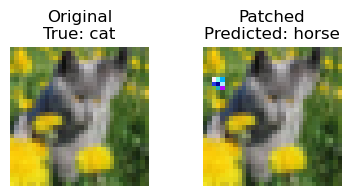

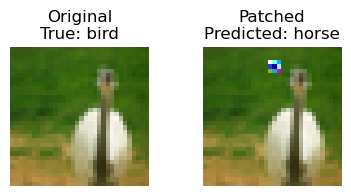

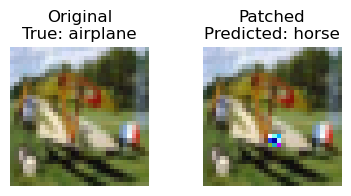

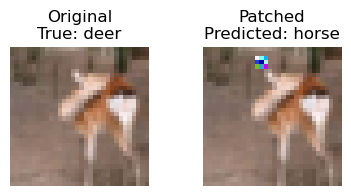

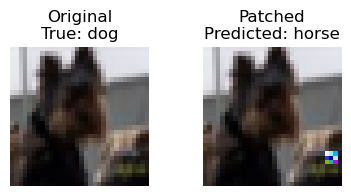

Targeted Attack Success Rate (Class 8): 9.98%


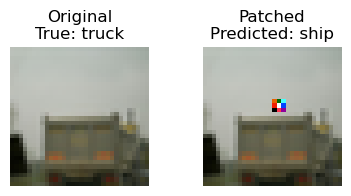

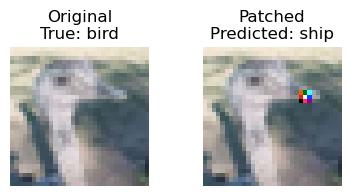

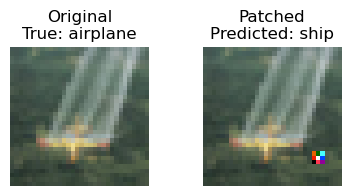

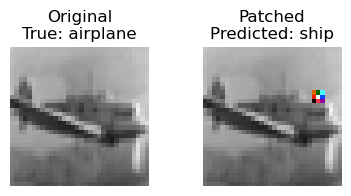

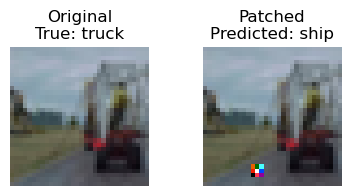

Targeted Attack Success Rate (Class 9): 9.84%


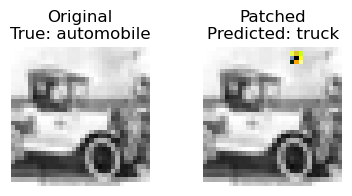

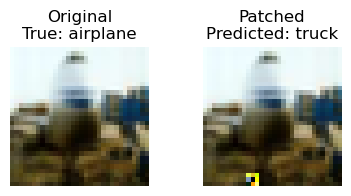

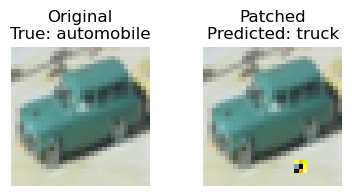

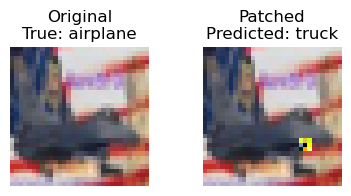

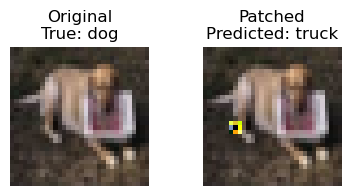

In [ ]:
for target_class in target_classes:
  for patch_size in patch_sizes:
    patch_filename = f"adversarial_patch_{class_names[target_class]}_{patch_size}.pth"

    patch = torch.load(patch_filename).to(device)

    evaluate_patch(model, patch, testloader, target_class=target_class)

    # Visualize misclassified patched images
    visualize_misclassified_patched_images(
        model=model,
        patch=patch,
        dataloader=testloader,
        target_class=target_class,
        num_images=5,  # Number of examples to visualize
    )/;''''''''